# Streaming in Numbers: **Netflix Data Analysis**

#### **About :**

**Netflix** is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of **mid-2021**, they have over **222M** Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - **cast, directors, ratings, release year, duration, etc.**

**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [ ]:
## upload the data into the colab from google drive

!gdown 1o-VnK596GU1U2Qbshcu3Ows8F6_v0USy

Downloading...
From: https://drive.google.com/uc?id=1o-VnK596GU1U2Qbshcu3Ows8F6_v0USy
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 77.7MB/s]


In [ ]:
## import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## load the data into dataframe

df = pd.read_csv('netflix.csv')

#### Basic Data Info

In [ ]:
# dimension of the data
df.ndim

2

In [ ]:
# shape of the data
df.shape

(8807, 12)

In [ ]:
#-- total rows in the dataset
print('Total Rows are : ', df.shape[0])
print('Total Columns are : ', df.shape[1])

Total Rows are :  8807
Total Columns are :  12


The **Netflix** Dataset consists of *2 dimensions* i.e. collections of 1D arrays and total rows in the dataset are **8807** and total columns are **12**.

In [ ]:
# sample of the data : top 5 records

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The dataset consists of a list of all the TV shows/movies available on **Netflix**:

* **Show_id**: Unique ID for every Movie / Tv Show
* **Type**: Identifier - A Movie or TV Show
* **Title**: Title of the Movie / Tv Show
* **Director**: Director of the Movie
* **Cast**: Actors involved in the movie/show
* **Country**: Country where the movie/show was produced
* **Date_added**: Date it was added on Netflix
* **Release_year**: Actual Release year of the movie/show
* **Rating**: TV Rating of the movie/show
* **Duration**: Total Duration - in minutes or number of seasons
* **Listed_in**: Genre
* **Description**: The summary description

In [ ]:
# find the data type of all variable and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* In the **Netflix** Data , only the release year has int dataype , except all are objects.



---


* Dataset has **8807** total rows.
Here’s the missing value breakdown:

 * **Director** - 2634 missing values

 * **Cast** - 825 missing values

 * **Country** - 831 missing values

 * **Date Added** - 10 missing values

 * **Rating** - 4 missing values

 * **Duration** - 3 missing values

 This means columns like Director are highly incomplete than others .

In [ ]:
#statistical measures

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Total number of rows are 8807 .  

Standard Deviation content spans about 9 years around the mean.

Mean of the released year is 2014.

Most Netflix content in the dataset is from **2013–2019** (between 25% - 75%) , with the bulk of releases around **2017** (median value of the year). Very few are older (before 2000).

In [ ]:
# convert the date_added feature into date
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')

In [ ]:
#-- check is there any duplicacy in the data ??

print(df.duplicated().sum())

0


Not a Single record is duplicated , all are unique , if in case records founds duplicated , recommends to drop duplicated records

In [ ]:
## But what it shows unique because we had showID unique and what if records has same movie and its title repetition in the data and because of unique show id assigned to them resulted in unique
temp_testing_duplication = pd.DataFrame({'Title': df['title'],
                                         'Type': df['type'],
                                         'Year': df['release_year']})
temp_testing_duplication.head()

,Title,Type,Year
0,Dick Johnson Is Dead,Movie,2020
1,Blood & Water,TV Show,2021
2,Ganglands,TV Show,2021
3,Jailbirds New Orleans,TV Show,2021
4,Kota Factory,TV Show,2021


In [ ]:
#check duplicacy on this temp data becaz there is no unique code assigned to them , so if they repeats they tells the duplicacy record in the dataset
print(temp_testing_duplication.duplicated().sum())

0


Not a Single record is duplicated, all are unique in Netflix Dataset

In [ ]:
#-- In the dataset , just confirm that is the type contain movies or series or other than any of them
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Dataset contains only of two type of streaming videos which is movies and series .

In [ ]:
df.rename({'listed_in': 'genres'}, axis = 1, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

Listed In Column didnt suited as it has the content , rename it to the Genres

In [ ]:
#-- find out that after releasing the show , how many years show takes to add to the netflix ?

df['time_taken_to_add'] = df['date_added'].dt.year - df['release_year']
df['time_taken_to_add'].fillna(0).astype(int).head()

,time_taken_to_add
0,1
1,0
2,0
3,0
4,0


* When the show release , find out that which show uploaded after how many years or does that impact the popularity or not in the further analysis .
* Whatever has 0 , that means , show has been added within 1 year .

In [ ]:
#-- which type of show has been uploaded the most ??
np.round(df['type'].value_counts(normalize = True)* 100, 2)

,proportion
type,
Movie,69.62
TV Show,30.38


Movies are approx 70% of the total collection where series are 30%.

In [ ]:
#-- In which year shows has been added ?
yearly = df['date_added'].dt.year.value_counts(normalize=True) * 100
yearly.index = yearly.index.astype(int)
yearly.round(2).head()

,proportion
date_added,
2019,22.92
2020,21.36
2018,18.75
2021,17.03
2017,13.50


Most of the movies has been added to the Netflix in 2019, slightly less in 2020 and according to the statistical calculation , 75% of the released year lie in 2019 and median was 2017.

* In statistical measures, the median release year is **2017** - which means most of the title in the Netflix has movies which was released more in 2017.

* In value counts of date_added, the peak is in **2019** - because Netflix acquired and uploaded more content that year (doesn’t matter when it was released).

In [ ]:
#-- Netflix has most of the shows of which country ?

popular_country = df['country'].value_counts(normalize = True) * 100
popular_country

,proportion
country,
United States,35.330993
India,12.186560
United Kingdom,5.253260
Japan,3.071715
South Korea,2.494985
...,...
"Mexico, United States, Spain, Colombia",0.012538
"Canada, Norway",0.012538
"Finland, Germany, Belgium",0.012538


In [ ]:
# I have observed most of the countries has been grouped with other so its this way not include the correct proportion of the data....

# I decided to split the country values wherever multiple countries were listed together. Use strip to trim unwanted white space.
# Additionally, I filtered out empty country entries (if any), since they don’t contribute to the analysis and removing them doesn’t impact the required frequency calculation.

all_countries = []

for c in df['country'].fillna('').str.split(','):
  all_countries.extend(c)

all_countries = [x.strip() for x in all_countries if x.strip() != '']
all_countries[:5]

['United States', 'South Africa', 'India', 'United States', 'Ghana']

In [ ]:
#-- Netflix has most of the shows of which country ?

np.round(pd.Series(all_countries).value_counts(normalize = True) * 100, 2).head()

,proportion
United States,36.86
India,10.45
United Kingdom,8.05
Canada,4.44
France,3.93


**Netflix** added most of the shows of the **United States** and then on the second most **India** cames and further more.

In [ ]:
#-- which countries shows has been added to the Netflix on the basis of its type ?

#splits that list of countries into multiple rows.

df2 = df.assign(country = df['country'].str.split(',')).explode('country')

# make sure there should not be extra whitespace
df2['country'] = df2['country'].str.strip()


In [ ]:
# Now Founds that on the basis of type , which countries content has been added to the Netflix?

np.round(df2[df2['type'] == 'Movie']['country'].value_counts(normalize= True) * 100, 2).head() # on the basis of movie

,proportion
country,
United States,37.30
India,13.04
United Kingdom,7.24
Canada,4.32
France,4.11


In [ ]:
np.round(df2[df2['type'] == 'TV Show']['country'].value_counts(normalize= True) * 100, 2).head() # on the basis of series

,proportion
country,
United States,35.53
United Kingdom,10.30
Japan,7.54
South Korea,6.44
Canada,4.77


* In terms of **Movies** , **United state** and **India** contents has been added to the Netflix more.
* In terms of **Series** , **United State** and **United Kingdom** content are more demandable .

In [ ]:
#-- Which genre people are watching most ?


# genres also have group of multiples, so splits that and add it to the list of genres .
# use strip to make sure no extra whitespace .

all_genre = []

for g in df['genres'].str.split(','):
  all_genre.extend([x.strip() for x in g])
all_genre[:5]

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows']

In [ ]:
pd.Series(all_genre).value_counts().head(10)

,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


Assumes the **threshold value 850** and above 850 consider them people likes the content most

* Users love to watch **International Movies , Dramas , Comedies , Action & Adventure**.
* But Users love the most **International Movies and Dramas .**

In [ ]:
#-- Who  is the most popular director ?

#splits that list of director into multiple rows.
director = df.assign(director = df['director'].str.split(',')).explode('director')

#this feature contains null values , so fill them with empty string and then strip to avoid extra white step
director['director'] = director['director'].fillna('').str.strip()

# filter the records where directors are null , since they don’t contribute to the analysis and removing them doesn’t impact the required frequency calculation.
director = director[director['director'] != ""]
director['director'].value_counts().head(10)

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


**Rajiv Chilaka** is the most popular director, having the highest number of shows listed on Netflix.

* **Rajiv Chilaka** - Most popular Director on Netflix .
* **Jan Suter** - Close to the top, with only a slight difference compared to Rajiv Chilaka, and can also be considered a popular director.
* **Raul Campos, Suhas Kadav, and Marcus Raboy** - These directors have a noticable presence as well, as they are also contributors to the Netflix content library.

In [ ]:
#-- At which month is best to release a movie?

dt_month = df['date_added'].fillna('').dt.month
dt_month_lst = dt_month[dt_month.values <= 12].values.astype('int')
dt_month_lst

array([ 9,  9,  9, ..., 11,  1,  3])

In [ ]:
pd.Series(dt_month_lst).value_counts()

,count
7,827
12,813
9,770
4,764
10,760
8,755
3,742
1,738
6,728
11,705


* **July** and **December** are more compatable good to launch Shows on Netflix .
* Netflix platform have slightly less number of shows launched in **Februaury** and **May**.

In [ ]:
# -- Which actors appear most often in Netflix content?


# create a list of cast by split them separately
df_cast = []

for c in df['cast'].fillna('').str.split(','):
  df_cast.extend(c )


# make sure there should not be extra white space
df_cast = [x.strip() for x in df_cast if x.strip() != '']
df_cast[:5]

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel']

In [ ]:
top_5_cast = pd.Series(df_cast).value_counts()[:5]
top_5_cast

,count
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32


**Top 5 Actors** on the **Netflix** Show:

* **Anupam Kher** has most number of shows .
* Rest of them are considers under the top 5 cast who loved most to watched by user.

In [ ]:
for actor in top_5_cast.index:
    present_in = df['cast'].fillna('').str.contains(actor)
    print(actor, "appears in", present_in.sum(), "TV shows.")


Anupam Kher appears in 43 TV shows.
Shah Rukh Khan appears in 35 TV shows.
Julie Tejwani appears in 33 TV shows.
Takahiro Sakurai appears in 32 TV shows.
Naseeruddin Shah appears in 32 TV shows.


In [ ]:
#-- Who dominates in movies vs TV shows?

for actor in top_5_cast.index:
  cast_movie_count = df[(df['cast'].fillna('').str.contains(actor)) & (df['type'] == 'Movie')].shape[0]
  cast_series_count = df[(df['cast'].fillna('').str.contains(actor)) & (df['type'] == 'TV Show')].shape[0]
  print(f'{actor} has {cast_movie_count} movies and {cast_series_count} series. ')

Anupam Kher has 42 movies and 1 series. 
Shah Rukh Khan has 35 movies and 0 series. 
Julie Tejwani has 28 movies and 5 series. 
Takahiro Sakurai has 7 movies and 25 series. 
Naseeruddin Shah has 32 movies and 0 series. 


As I observed from Analysis , from the **Top 5 Cast** who ***users love the most*** to watch , Out of them :     
* **Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin** are dominates in the **movie**.
* **Takahiro Sakurai** are most dominate in **Series**.

As a result :     
* Users love towards the **Movie** as I have observed Movies content has been added mostly to the Netflix and out of top 5 cast, 90% of them dominates in movie.

In [ ]:
#-- Trend of Netflix content addition year by year.

shows_per_year = df.groupby(df['date_added'].fillna('').dt.year)['title'].count()
shows_per_year.index = shows_per_year.index.astype(int)


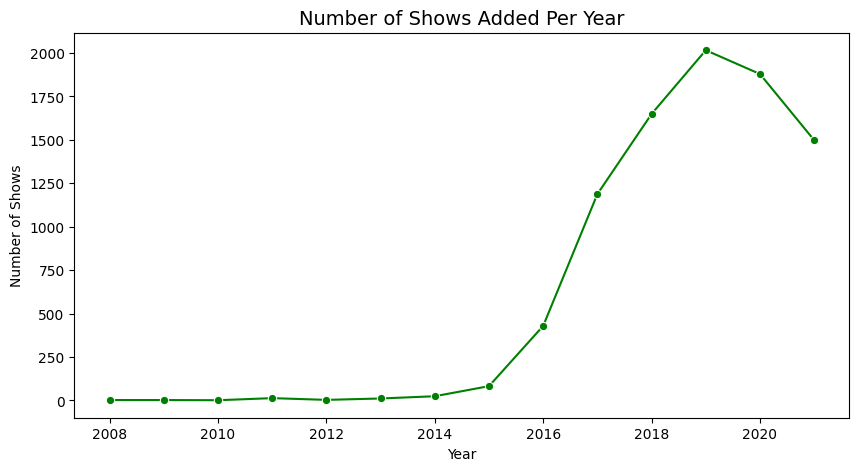

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=shows_per_year.index, y=shows_per_year.values, marker="o", color = 'g')
plt.title("Number of Shows Added Per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.savefig("Shows_per_Year.png", dpi=300, bbox_inches="tight")
plt.show()



After **2015** , **Netflix start adding more content** as usual but after **2019 it started declining .**

In [ ]:
#-- Segregated the Content Growth Trend split by Type (Movie/TV Show).

movies_trend = df.groupby(df[df['type'] == 'Movie']['date_added'].fillna('').dt.year)['title'].count()
series_trend = df.groupby(df[df['type'] == 'TV Show']['date_added'].fillna('').dt.year)['title'].count()

movies_trend.index = movies_trend.index.astype(int)
series_trend.index = series_trend.index.astype(int)

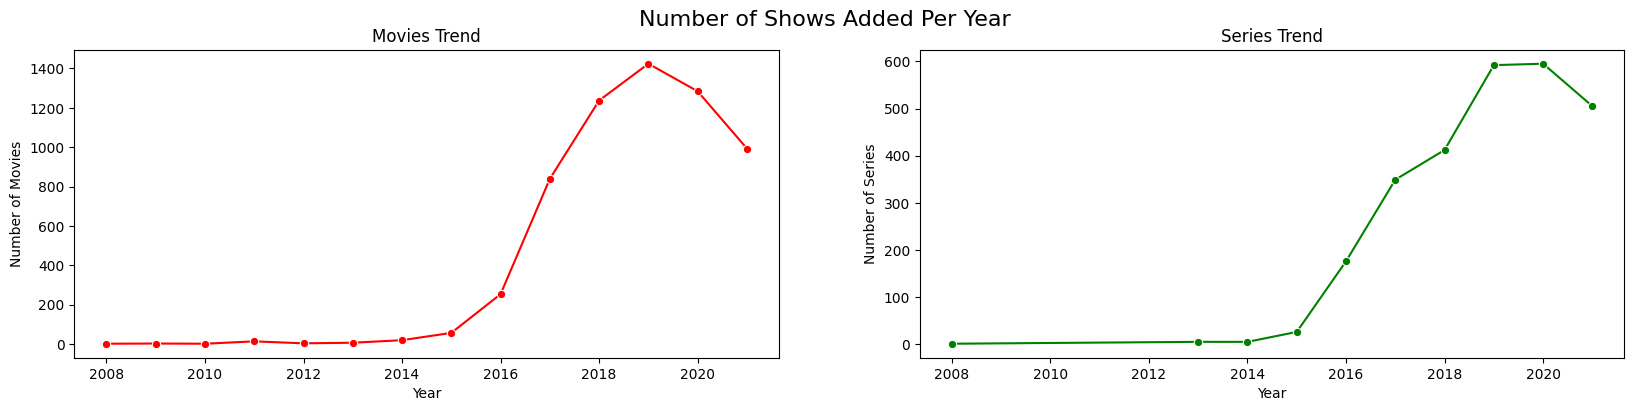

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=movies_trend.index, y=movies_trend.values, marker="o", color='r')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Trend")


plt.subplot(1, 2, 2)
sns.lineplot(x=series_trend.index, y=series_trend.values, marker="o", color='g')
plt.xlabel("Year")
plt.ylabel("Number of Series")
plt.title("Series Trend")

plt.suptitle("Number of Shows Added Per Year", fontsize=16)
plt.savefig("Shows_Trend.png", dpi=300, bbox_inches="tight")
plt.show()

After analyzing the dataset, it was observed that **Netflix** expanded its content after 2016, reaching its **peak** growth period between **2016 and 2019**. However, after 2019, the number of new additions started to decline.

When segregated by type, the following trends were observed:

* **Movies-** Sharp increase in additions from 2016 to 2019.
* **Series-** Growth started earlier, around 2015, and continued until 2019.

The analysis highlights that **Netflix** added more contents between **2016 - 2019**, especially in **movies**. However, **both movies and series have shown a decline in additions after 2019.**

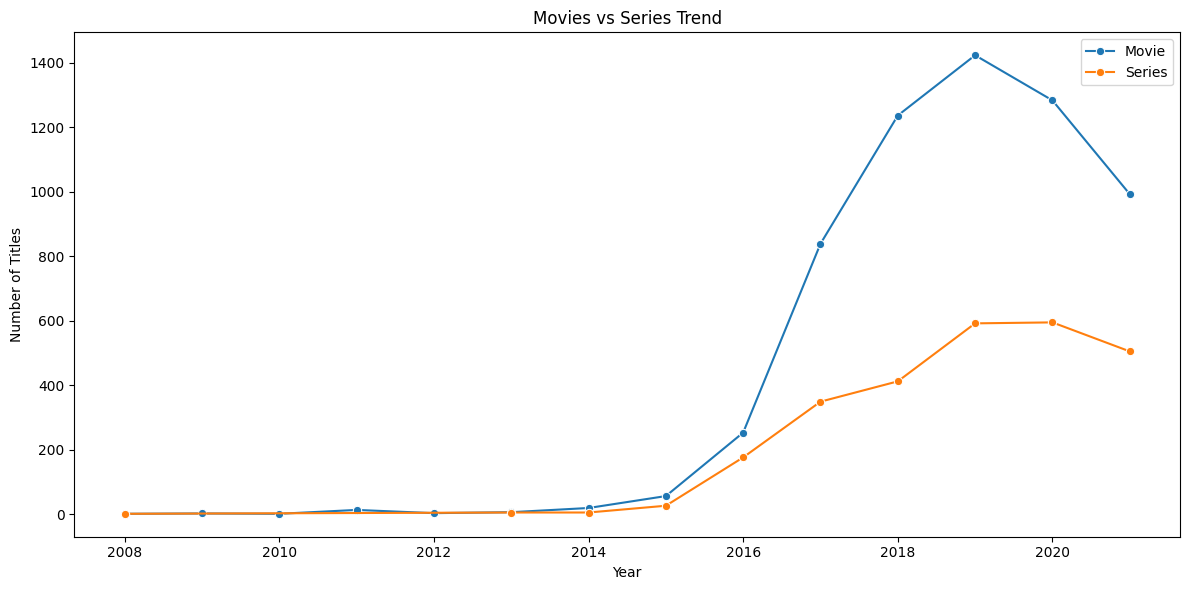

In [ ]:
movies_df = movies_trend.reset_index()
movies_df.columns = ["Year", "Count"]
movies_df["Type"] = "Movie"

series_df = series_trend.reset_index()
series_df.columns = ["Year", "Count"]
series_df["Type"] = "Series"


trend_df = pd.concat([movies_df, series_df])

plt.figure(figsize=(12,6))

sns.lineplot(data=trend_df, x="Year", y="Count", hue="Type", marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Movies vs Series Trend")
plt.legend()
plt.tight_layout()
plt.savefig("Movie_vs_Series_Trend.png", dpi=300, bbox_inches="tight")
plt.show()



In the above analysis , we have done subplotting of year and number of show (bi-variant). In this scenario , we have done analysis on year , number of show and types (multi-variant).

In [ ]:
#-- Duration Analysis For movies - Find average runtime in mins.

movie_duration = df[df['type'] == 'Movie']['duration'].fillna("0 min").str.split(' ')
movie_duration_list = [md[0] for md in movie_duration]
movie_duration_list = pd.Series(movie_duration_list).astype(int)

In [ ]:
np.mean(movie_duration_list).round(2)

np.float64(99.53)

In [ ]:
#-- Duration Analysis For TV shows - Average number of seasons.

series_duration = df[df['type'] == 'TV Show']['duration'].fillna('0 season').str.split(' ')
series_duration_list = [sd[0] for sd in series_duration]
series_duration_list = pd.Series(series_duration_list).astype(int)

In [ ]:
np.mean(series_duration_list).round(2)

np.float64(1.76)

Average Duration for **movie** is **99 min** , i.e., max of the movie runtime is 99 min approx where maximum **series** has average **2** **season** approx.

In [ ]:
#-- Which country produces the longest movies on Netflix?

# creates a new dataframe where country has been splitted into multiple rows
new_df = df.assign(country = df['country'].str.split(',')).explode('country')

# make sure there should be no extra whitespace
new_df['country'] = new_df['country'].fillna("").str.strip()

# filter the records where country is not empty , as we required to analyse based on the country , if filters the row where country info is null , it doesnt impact on the analysis
new_df = new_df[new_df['country'] != ""]


In [ ]:
# create new df for movie and pre - process to get a new series of duration in numbers
movies_df = new_df[new_df['type'] == 'Movie'].copy()

movies_df['duration_num'] = movies_df['duration'].fillna('0 min').str.split(' ').str[0].astype(int)

# filter movie record to the maximum duration
result = movies_df[movies_df['duration_num'].max() == movies_df['duration_num']]['country']
result

,country
4253,United States


**United State** produces the **longest** **Movie** on **Netflix**. It's Duration maybe near to 99 mins.

In [ ]:
#-- Which genres are more popular in different countries?

genres_df = new_df.copy()


# split the info into multiple rows and no extra white space
genres_df = new_df.assign(genres = new_df['genres'].str.split(',')).explode('genres')
genres_df['genres'] = genres_df['genres'].fillna('').str.strip()
genres_df = genres_df[genres_df['genres'] != ""]


genres_df.groupby('country')['genres'].value_counts().sort_values(ascending = False).reset_index().head(10)


,country,genres,count
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,512
5,United States,Action & Adventure,404
6,United States,Children & Family Movies,390
7,United States,Independent Movies,390
8,India,Comedies,323
9,United States,Thrillers,292


On the basis of the above scenario :    
* **India** and **United States** contents are more popular on **Netflix** .
* **India** has **International Movies** on top where United States has **Dramas** Content .
* **India** in International Movies has slightly more than United States in Drama.
* **India** is more popular in *International Movies , Dramas* where United States is popular in *Dramas, Comedies, Documentaries.*

In [ ]:
#-- Which director is dominant in which genre?


# split director info into multiple row and there should not be extra whitespace
director_df = genres_df.assign(director = genres_df['director'].str.split(',')).explode('director')
director_df['director'] = director_df['director'].fillna('').str.strip()
director_df = director_df[director_df['director'] != ""]

director_df.groupby('director')['genres'].value_counts().sort_values(ascending = False).reset_index().head(10)


,director,genres,count
0,Jan Suter,Stand-Up Comedy,21
1,Raúl Campos,Stand-Up Comedy,19
2,Youssef Chahine,Dramas,17
3,Martin Campbell,Action & Adventure,15
4,Youssef Chahine,International Movies,15
5,Marcus Raboy,Stand-Up Comedy,14
6,Jay Karas,Stand-Up Comedy,14
7,Cathy Garcia-Molina,International Movies,13
8,Martin Scorsese,Dramas,13
9,Don Michael Paul,Action & Adventure,13


* **Jan Suter** and **Raúl Campos** are the top two directors, both in **Stand-Up Comedy.**
* 4 out of the top 10 directors are linked with Stand-Up Comedy as it is dominant genre.
* Youssef Chahine appears twice with different genres: Dramas and International Movies .
* Youssef Chahine and Martin Scorsese are dominant in Dramas as they have competition to each other.
* **Most Directors** leading in **Stand - Up Comedy** and rest of them are in good competition.

In [ ]:
#-- Which age rating dominates Netflix?

df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


* **TV-MA** and **TV-14** are the top ratings in overall the shows.
* Shows which have these ratings (TV-PG, R , PG-13 ) are consider as good .

In [ ]:
#-- Compare rating distribution for Movies vs TV Shows.

movie_rating = df[df['type'] == 'Movie']['rating'].value_counts().reset_index()
series_rating = df[df['type'] == 'TV Show']['rating'].value_counts().reset_index()
movie_rating.columns

Index(['rating', 'count'], dtype='object')

In [ ]:
# drop the unneccessary info
movie_rating.drop( movie_rating[movie_rating['rating'].str.contains('min')].index, axis = 0, inplace = True)

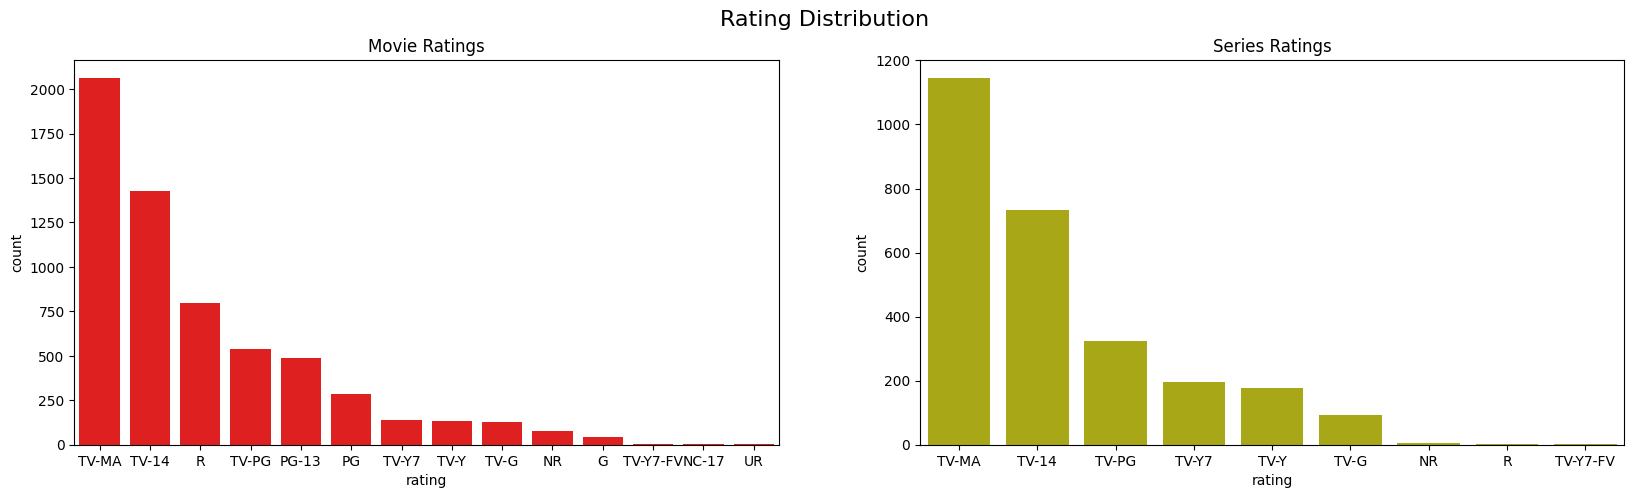

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.barplot(data=movie_rating, x='rating', y='count', color = 'r')
plt.title("Movie Ratings")

plt.subplot(1, 2, 2)
sns.barplot(data=series_rating, x='rating', y='count', color = 'y')
plt.title("Series Ratings")

plt.suptitle("Rating Distribution", fontsize=16)
plt.savefig("Rating_Distribution.png", dpi=300, bbox_inches="tight")

plt.show()

**Rating Distribution among Movie and Series :**    
* In Movies
 * **(TV-MA)** **Mature** Audience is the highest, suggesting Netflix movies lean heavily toward adult content.
 * **TV-14** is popular for **teens** and above, second most common in Movies.
 * **Family/kids** ratings like **PG, TV-Y, G** are much less frequent in movies.
* In Series
 * **(TV-MA)** **Mature** Audience is the highest, suggesting Netflix TV Shows lean heavily towards adult content .
 * **TV-14** is popular for **teens** and above, second most common in TV Shows.
 * **Family/kids** ratings like **PG, TV-Y, G** are much less frequent.

In [ ]:
#-- Which countries tend to produce more family-friendly shows?

def audience(rating):
  kids = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'G']
  teens = ['PG', 'PG-13', 'TV-14']
  adults = ['R', 'NC-17', 'TV-MA']

  if rating in kids :
    return 'Kid'
  elif rating in teens :
    return 'Teen'
  elif rating in adults :
    return 'Adult'
  else :
    return ''

# vectorize this function to the specific series to create new feature
new_df['Audience'] = new_df['rating'].apply(audience)

In [ ]:
# filter the country into each audience and then group them and find rating counts
kid_friendly_countries = new_df[new_df['Audience'] == 'Kid'].groupby('country')['rating'].count().sort_values(ascending = False)
teen_friendly_countries = new_df[new_df['Audience'] == 'Teen'].groupby('country')['rating'].count().sort_values(ascending = False)
adult_friendly_countries = new_df[new_df['Audience'] == 'Adult'].groupby('country')['rating'].count().sort_values(ascending = False)

In [ ]:
audience_countries = pd.DataFrame({
    'kid friendly': kid_friendly_countries,
    'teen friendly': teen_friendly_countries,
    'adult friendly': adult_friendly_countries
})

In [ ]:
# sum-up all the audience count for each country and find the top audience countries
top_countries = audience_countries.sum(axis=1).sort_values(ascending=False).head(10).index

audience_top = audience_countries.loc[top_countries]

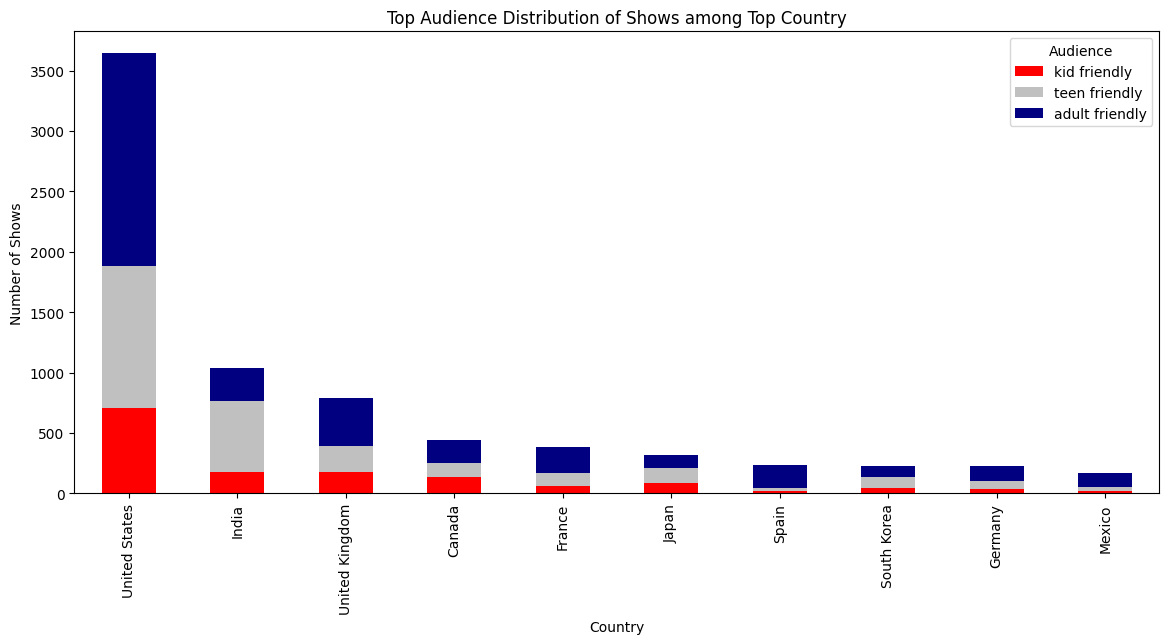

In [ ]:
audience_top.plot(kind="bar", stacked=True, figsize=(14,6), color = ('r', 'silver', 'navy'))
plt.title("Top Audience Distribution of Shows among Top Country")
plt.xlabel("Country")
plt.ylabel("Number of Shows")
plt.legend(title="Audience")
plt.savefig("Audience_Distribution_across_Top_Countries.png", dpi=300, bbox_inches="tight")
plt.show()

**Top Audience Distribution of Shows among Top Countries:**
* **United State** has the most of the content from overall where **India** came on the second most.
* **United State** has **strong** presence in all categories: Kid-friendly, Teen-friendly, Adult-friendly.
* **United State** is more dominant in **Adult** Content as it is most towards to Adult Friendly Content.
* **India** is the **second** largest producer.
* **India** has mostly content to Teen-friendly , then Adult then Kid.
* **India** is most dominant in **Teen-Friendly** shows.
* **United Kingdom** is slighlty competitive to India as it more dominant in **Adult** content then teen then Kids.
* Rest of them are less frequent and not a part of competitve range.

In [ ]:
#-- Which country produce more adult content?

country_with_most_adult_content = audience_countries['adult friendly'].sort_values(ascending = False).reset_index()[:10]
country_with_most_adult_content.columns


Index(['country', 'adult friendly'], dtype='object')

In [ ]:
country_with_most_teen_content = audience_countries['teen friendly'].sort_values(ascending = False).reset_index()[:10]
country_with_most_kids_content = audience_countries['kid friendly'].sort_values(ascending = False).reset_index()[:10]

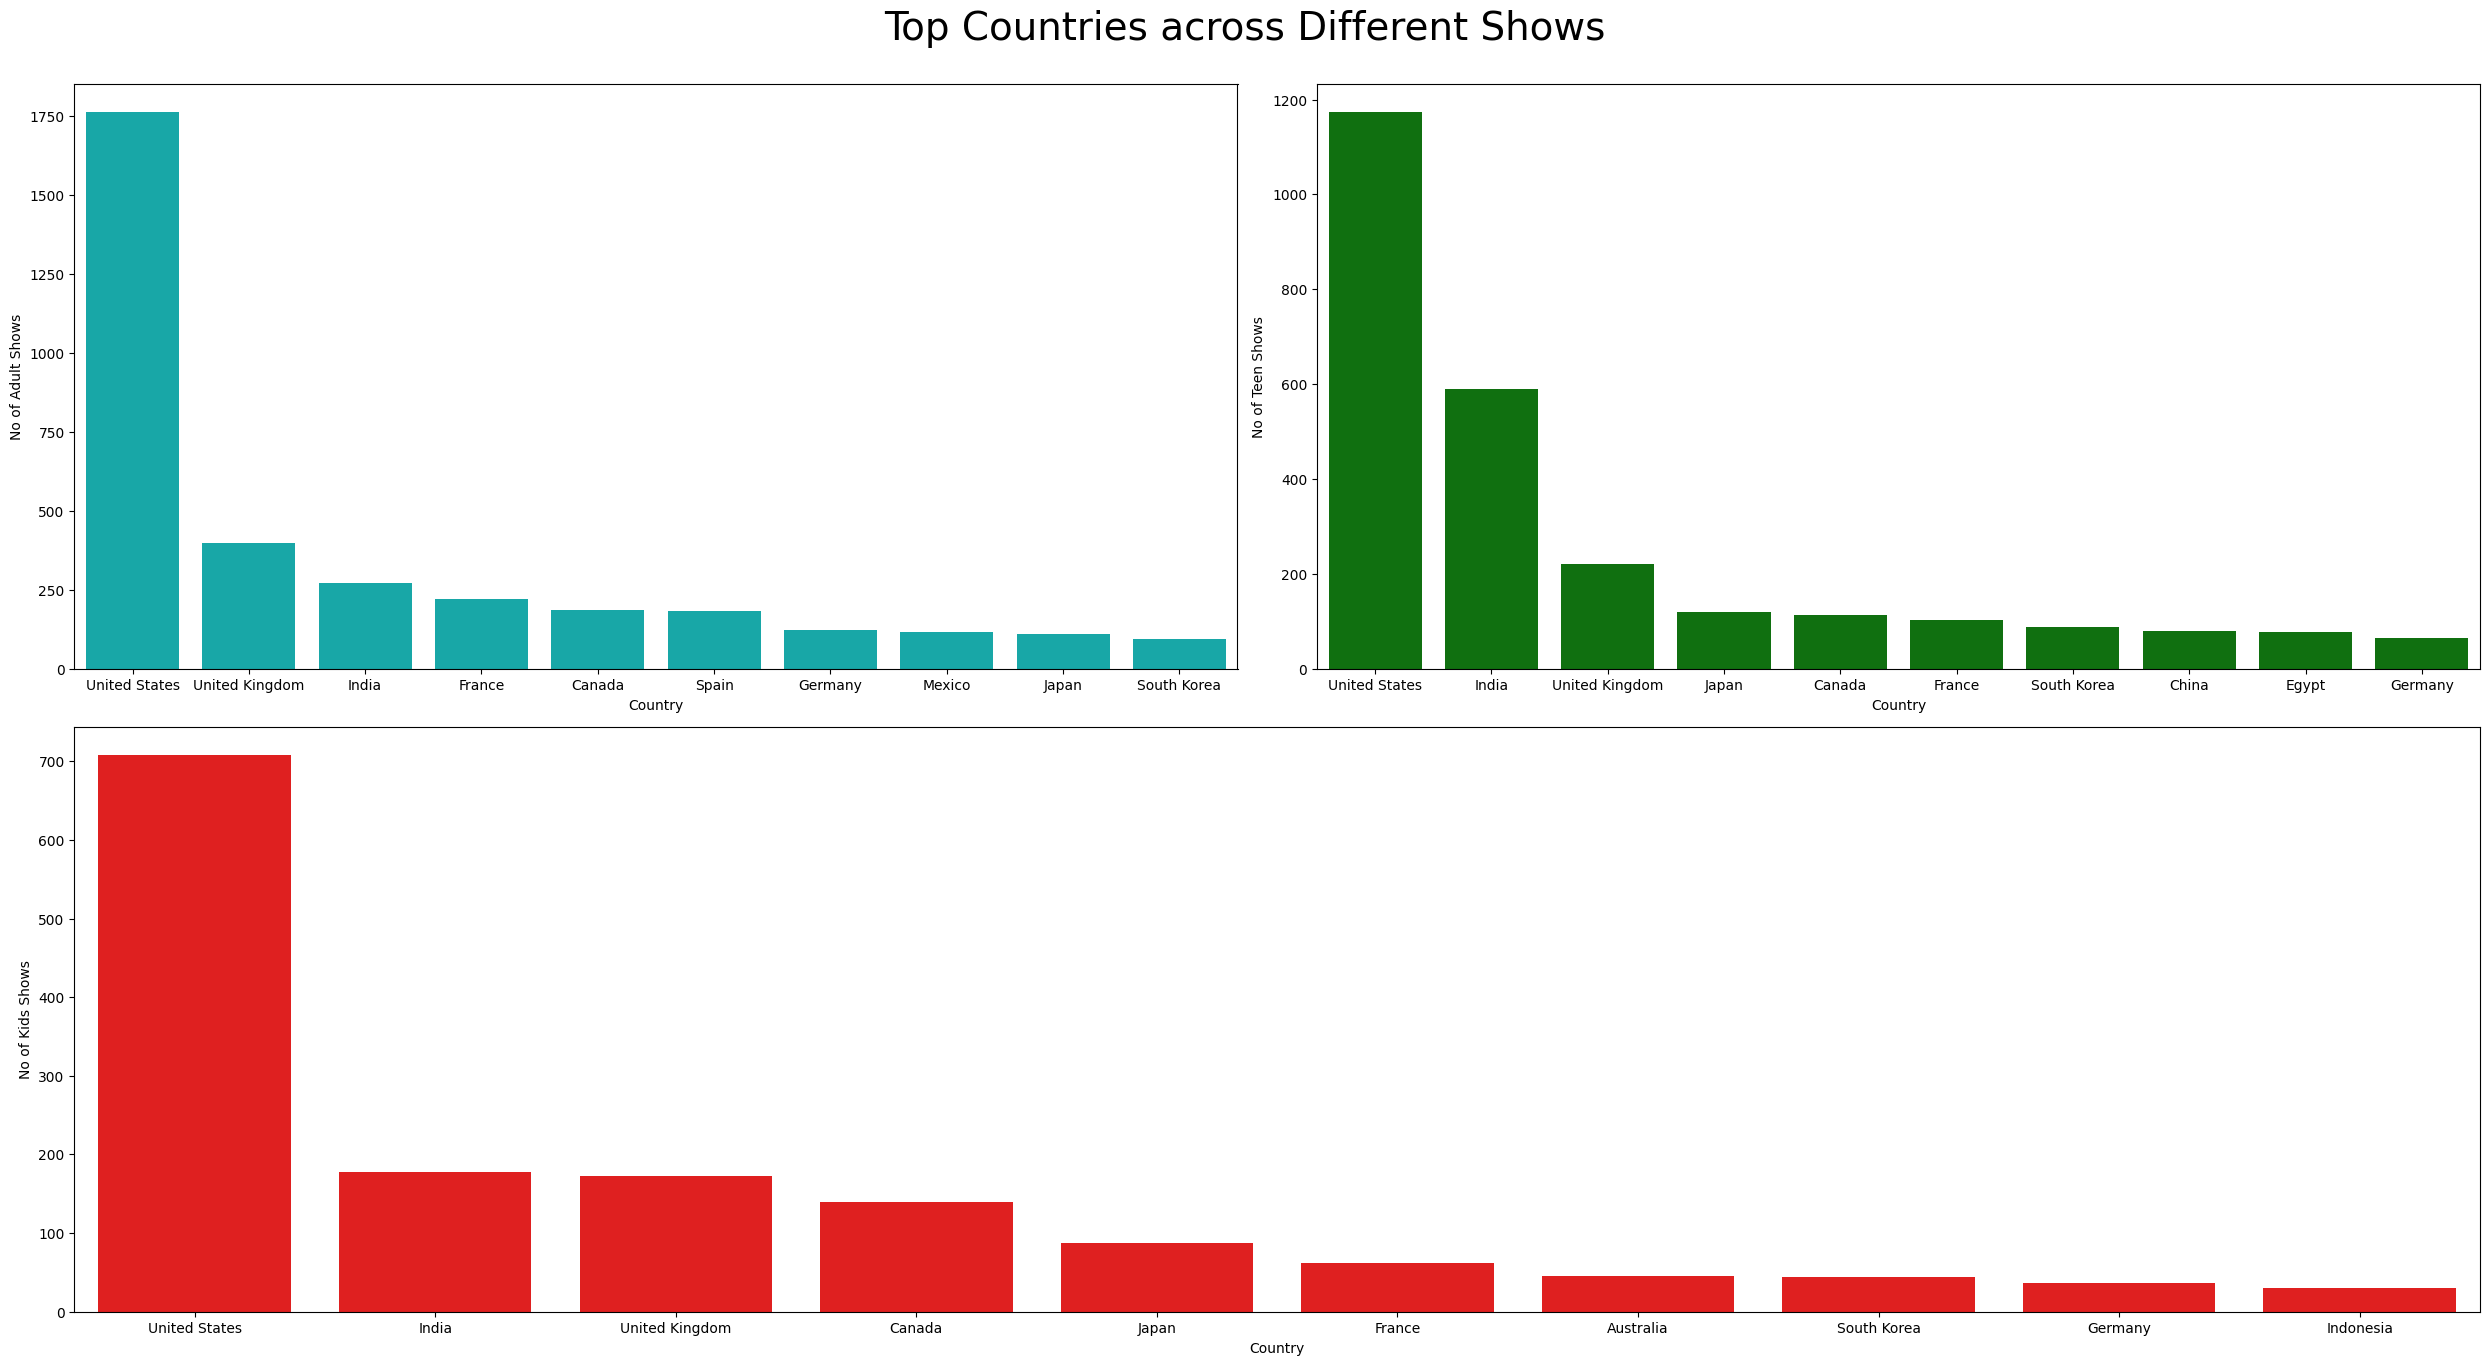

In [ ]:
plt.figure(figsize=(25, 20))


plt.subplot(3, 2, 1)
sns.barplot(data = country_with_most_adult_content, x = 'country', y = 'adult friendly', color = 'c')
plt.xlabel('Country')
plt.ylabel('No of Adult Shows')

plt.subplot(3, 2, 2)
sns.barplot(data = country_with_most_teen_content, x = 'country', y = 'teen friendly', color = 'g')
plt.xlabel('Country')
plt.ylabel('No of Teen Shows')


plt.subplot(3, 2, (3, 4))
sns.barplot(data = country_with_most_kids_content, x = 'country', y = 'kid friendly', color = 'r')
plt.xlabel('Country')
plt.ylabel('No of Kids Shows')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Top Countries across Different Shows', fontsize = 28)

plt.savefig("Top_Countries_with_Different_Shows.png", bbox_inches="tight")
plt.show()

As we have already observed that
* **United State** and **United Kingdom** are most dominant to the **Adult** content.
* **India** also produce Adult content as well but slightly less than the United State and United Kingdom.

Same as we can identify that
* **United State** has most of the **teen-content** where **India** came to the **second** most in **Teen-friendly** Content.
* **United State** produce more number of **Kids-friendly** content where **United Kingdom** & **India** have slight difference.

In [ ]:
#-- shows distribution among countries

show_distribution = new_df.groupby(['country', 'type']).size().reset_index(name = 'count')

# top 10 show distribution among countries

top_countries_show = show_distribution.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index
top_show_distribution = show_distribution[show_distribution['country'].isin(top_countries)]

pivot_df = top_show_distribution.pivot(index='country', columns='type', values='count').fillna(0)

<Figure size 1200x600 with 0 Axes>

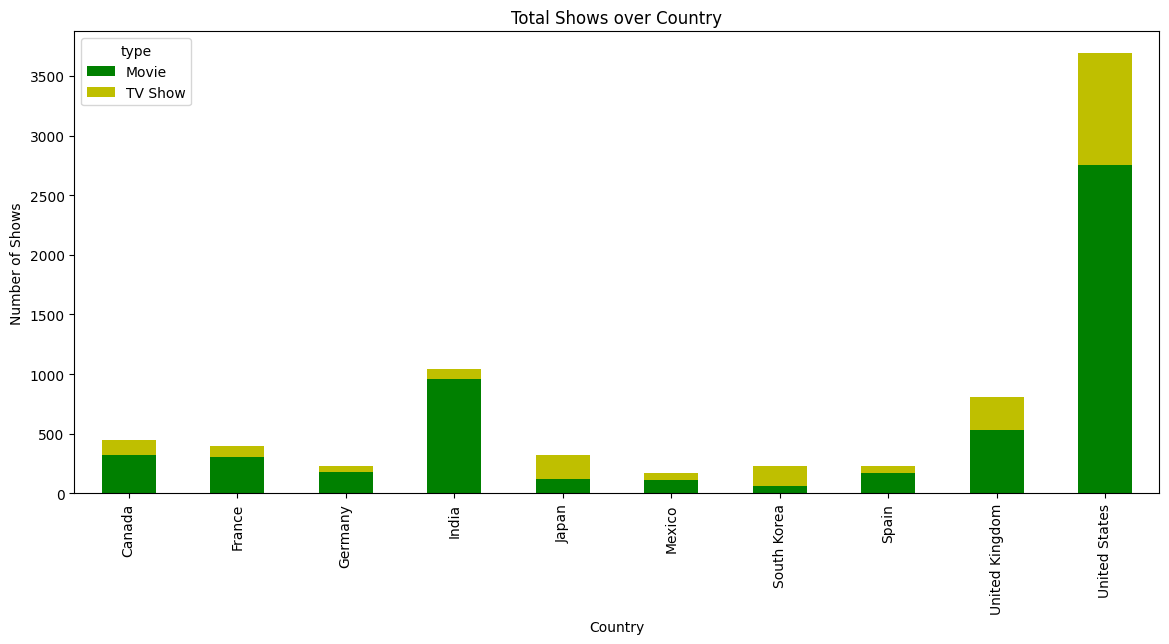

In [ ]:
plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, figsize=(14,6), color = ('g', 'y'))
plt.title("Total Shows over Country")
plt.xlabel("Country")
plt.ylabel("Number of Shows")
plt.legend(title="type")
plt.savefig("Total_shows_across_country.png", dpi=300, bbox_inches="tight")
plt.show()

* **United State** has the most number of shows among others .
* **India** came to the second highest content producer.
* **United state** is **movies** dominate, but **still has a strong TV show presence.**
* **India** is **Movie** dominate as it produces less number of series.
* **United Kingdom** is the **second** most **Series** dominant and **third** most **movie** dominant.
* **United Kingdom is balanced** as contributing to the both.
* **Netflix** relies on the **US for both movies & shows.**
* Other regions are smaller contributors but mostly movie-focused.

In [ ]:
#-- How has the genre trend changed?

genres_df['date_added'] = genres_df['date_added'].dt.year.fillna(0).astype(int)

genres_df = genres_df[genres_df['date_added'] != 0]

genres_trend= genres_df.groupby(['date_added', 'genres']).size().reset_index(name = 'count')
genres_trend.head(4)

,date_added,genres,count
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Stand-Up Comedy & Talk Shows,1
3,2008,Thrillers,1


In [ ]:
# find top 10 genres and filtered them from the genres_trend
top_genres = genres_trend.groupby('genres')['count'].sum().sort_values(ascending = False)[:10].index
filtered_genres = genres_trend[genres_trend['genres'].isin(top_genres)]

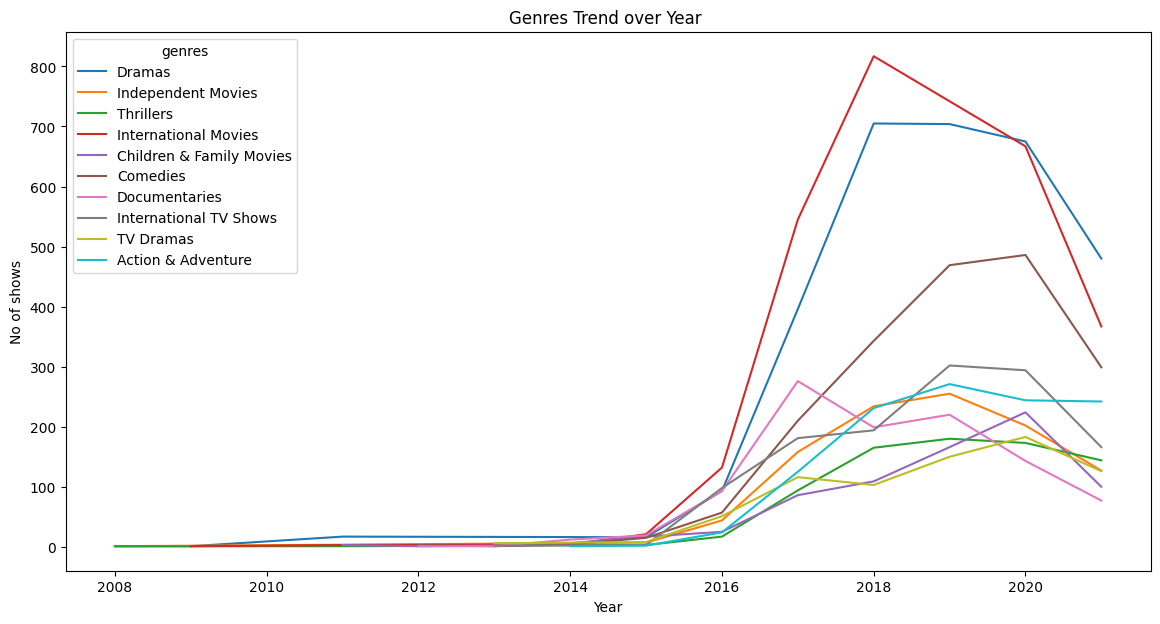

In [ ]:
plt.figure(figsize = (14, 7))

sns.lineplot(data = filtered_genres,x='date_added', y='count', hue='genres')
plt.xlabel('Year')
plt.ylabel('No of shows')
plt.title('Genres Trend over Year ')
plt.savefig("Genres_Trend_Over_Year.png", dpi=300, bbox_inches="tight")
plt.show()

* Each and every genres **started growing after 2015** .
* **International Movie** has been loved by users as it is more added to the Netflix Streaming Videos where it **rapidly grows till 2018** and start declining afterward.
* Most of the **genres started declining after 2019.**
* **Second** Most genre is **Drama** where it starts grow rapidly after 2015 and **starts declining after 2019.**
* **Third** most genre is **Comedy** which **starts declining after 2020.**





---



**Summary :**


**-India**
* India contributes heavily to** International Movies.**
* Netflix's Indian catalog is **movie-dominant**, not TV show heavy.
* India is more dominant in **Teens-friendly** Content.
* India contributes more in International Movies and best director for this genere are** Cathy Garcia-Molina, Youssef Chahine.**


**-United State**
* United state is strongly contributing to **comedy shows** and **dramas.**
* Netflix's United State catalog is **movie-dominant** but more dominant in **Series as well** than other countries.
* United state leads massively in **Stand-Up Comedy.**
* United States produces mostly content of **Adults**.
* United State more contribute in comedy show and top directors for this genre are **Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas** and for dramas , directors are **Youssef Chahine, Martin Scorsese.**

In [ ]:
#-- Which directors have the highest number of titles on Netflix?

directors_lst = director_df.groupby('director')['title'].count().sort_values(ascending= False).reset_index()

top_directors = directors_lst['director'][:10]

filtered_director = directors_lst[directors_lst['director'].isin(top_directors)]


/tmp/ipython-input-1451430044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_director, x='director', y='title', palette="viridis")


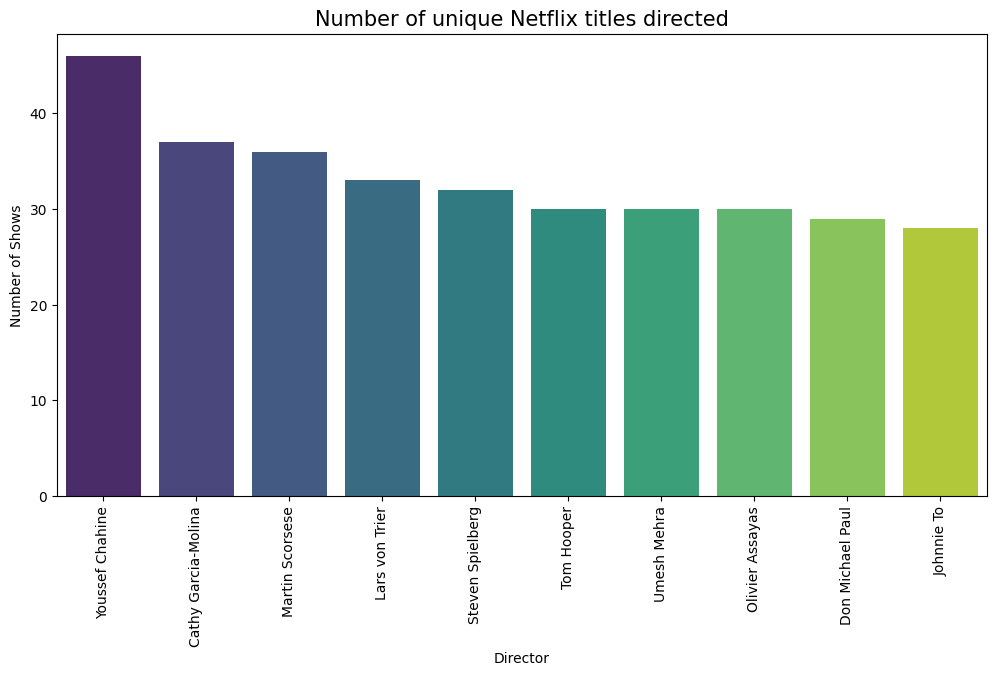

In [ ]:
plt.figure(figsize = (12, 6))

sns.barplot(data=filtered_director, x='director', y='title', palette="viridis")
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.title('Number of unique Netflix titles directed', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig("Top_Directors_directed_Unique_Title.png", dpi=300, bbox_inches="tight")

plt.show()

**From the Top 10 Director :**
* **Youssef Chahine** has been produces the max number of shows and he is mostly the content creator on **dramas** shows.
* **Cathy Garcia-Molina** is the second best producer and most dominant in **International Movies**.
* **Martin Scorsese** is the third most producer and most dominant in **dramas** shows.
* Rest of them are part of top 10 directors on the basis of number of shows.

In [ ]:
#-- Netflix Content Duration Comparison between Movies and Series

movies = df[df['type'] == 'Movie'].copy()
series = df[df['type'] == 'TV Show'].copy()

movies['duration_min'] = movies['duration'].str.replace(" min", "").fillna(0).astype(int)
series['no_of_season'] = series['duration'].str.replace(' Season', '').str.replace('s', '').fillna(0).astype(int)

movies.drop(movies[movies['rating'].str.contains('min', na=False)].index, axis=0, inplace=True )

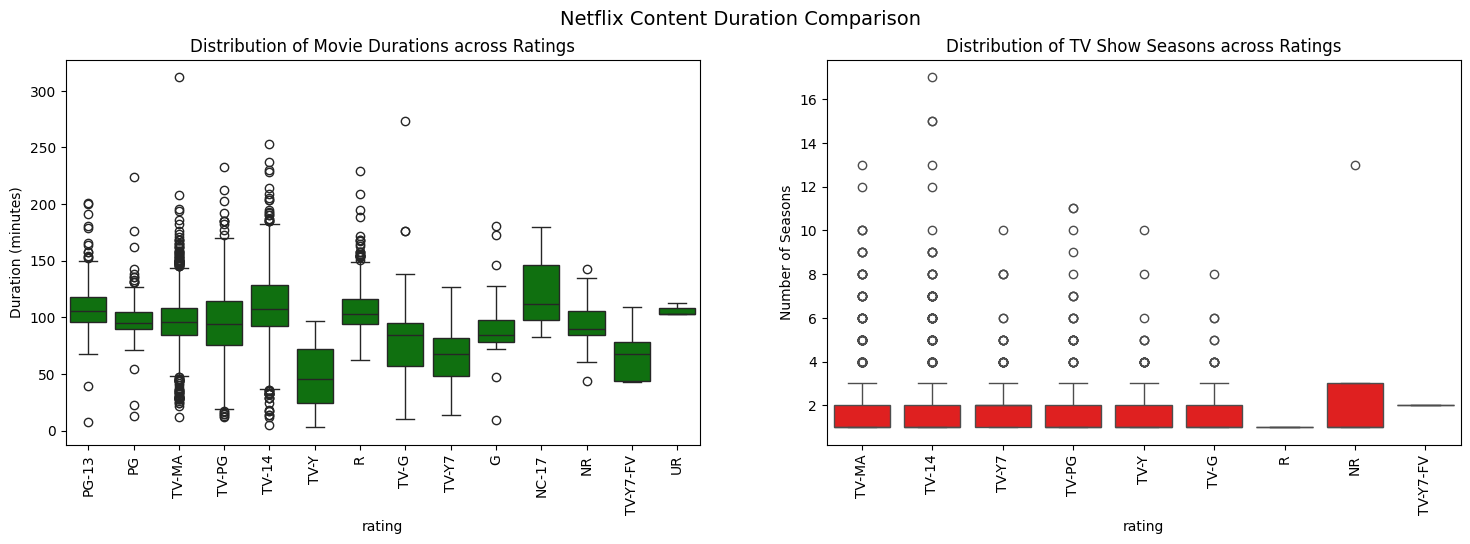

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=movies, x="rating", y="duration_min", color ='g')
plt.xticks(rotation=90)
plt.ylabel("Duration (minutes)")
plt.title("Distribution of Movie Durations across Ratings")

plt.subplot(1, 2, 2)
sns.boxplot(data=series, x="rating", y="no_of_season", color = 'r')
plt.xticks(rotation=90)
plt.ylabel("Number of Seasons")
plt.title("Distribution of TV Show Seasons across Ratings")

plt.suptitle("Netflix Content Duration Comparison", fontsize=14)
plt.savefig("Netflix_Content_Duration_Comparison.png", dpi=300, bbox_inches="tight")

plt.show()

**Duration across ratings in:**

**- Movies :**    
* Typical duration of movies lies between **90-120 minutes** for most rating categories (PG-13, PG, R, TV-14, etc.).
* Several ratings (TV-MA, PG, TV-14) have **outliers** up to **250-300 minutes**.
* Shortest movies are seen in TV-Y **(kids)** and TV-Y7, where median duration is **50-70 minutes**.

**- Series :**    
* Most series across ratings have **1 season** (median is 1 and max value is 2 seasons ).
* **Outliers** show long-running series like TV-MA, TV-14, TV-Y7 have outliers with **10-17 seasons.**

**Netflix** focuses on standard-length films **(90-120 mins)**, while most TV shows are short-lived **(1 season)**, with only a **few long-running hits** - mostly in **Mature** or **Kids** categories.

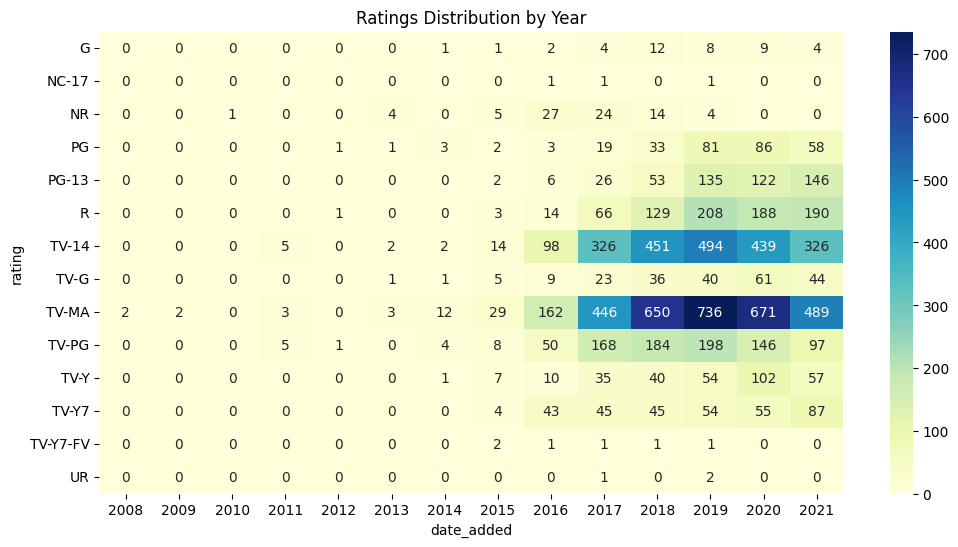

In [ ]:
# -- Content Addition in the each rating across year between 2008 - 2021

ratings_df = df.copy()

ratings_df['date_added'] = ratings_df['date_added'].dt.year.fillna(0).astype(int)
ratings_df = ratings_df[ratings_df['date_added'] != 0]

ratings_df['rating'] = ratings_df['rating'].astype(str)
ratings_df = ratings_df[~ratings_df['rating'].str.contains('min')]
ratings_df = ratings_df[~ratings_df['rating'].str.contains('nan')]

pivot_rating = ratings_df.pivot_table( index="rating", columns="date_added", values="show_id", aggfunc="count", fill_value=0 )

plt.figure(figsize=(12,6))
sns.heatmap(pivot_rating, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Ratings Distribution by Year")
plt.savefig('Rating_Dustribution_by_Year.png')
plt.show()


Total shows in the each rating across all year
* From **2016** onwards , there is **huge jump in the shows addition** to the Netflix Streaming Platform across almost all ratings.
* **TV-MA** (Mature Audition) has a good numbers of addition of shows in between **2018 to 2020.**
* **TV-14** (Teens content) also dominates a second rank of addition of shows in between **2018 to 2020.**
* **Other ratings** (PG, PG-13, R, TV-PG, TV-Y, TV-Y7) are much **smaller** in comparison.
* **Netflix** focuses heavily on **mature** content.
* Netflix peak position was on 2018 - 2020 **after 2020** it **starts declining** the addition of shows.


In [ ]:
# -- how Movies vs TV Shows evolved per year, country by country.

country_df = df.assign(country = df['country'].fillna('').str.split(',')).explode('country')
country_df['country'] = country_df['country'].str.strip()
country_df = country_df[country_df['country'] != 0]


top_countries = country_df['country'].value_counts().sort_values(ascending = False).head(5).index
df_top = country_df[country_df['country'].isin(top_countries)]
df_top['date_added'] = pd.to_datetime(df_top['date_added'])
df_top['year_added'] = df_top['date_added'].dt.year.fillna(0).astype(int)
df_top = df_top[df_top['year_added'] != 0]


country_trend = (df_top.groupby(['year_added', 'country', 'type']).size().reset_index(name='count'))
country_trend

/tmp/ipython-input-3428276429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['date_added'] = pd.to_datetime(df_top['date_added'])
/tmp/ipython-input-3428276429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['year_added'] = df_top['date_added'].dt.year.fillna(0).astype(int)


,year_added,country,type,count
0,2008,United States,Movie,1
1,2008,United States,TV Show,1
2,2009,United States,Movie,1
3,2010,United States,Movie,1
4,2011,United Kingdom,Movie,1
...,...,...,...,...
79,2021,India,TV Show,17
80,2021,United Kingdom,Movie,83
81,2021,United Kingdom,TV Show,37
82,2021,United States,Movie,452


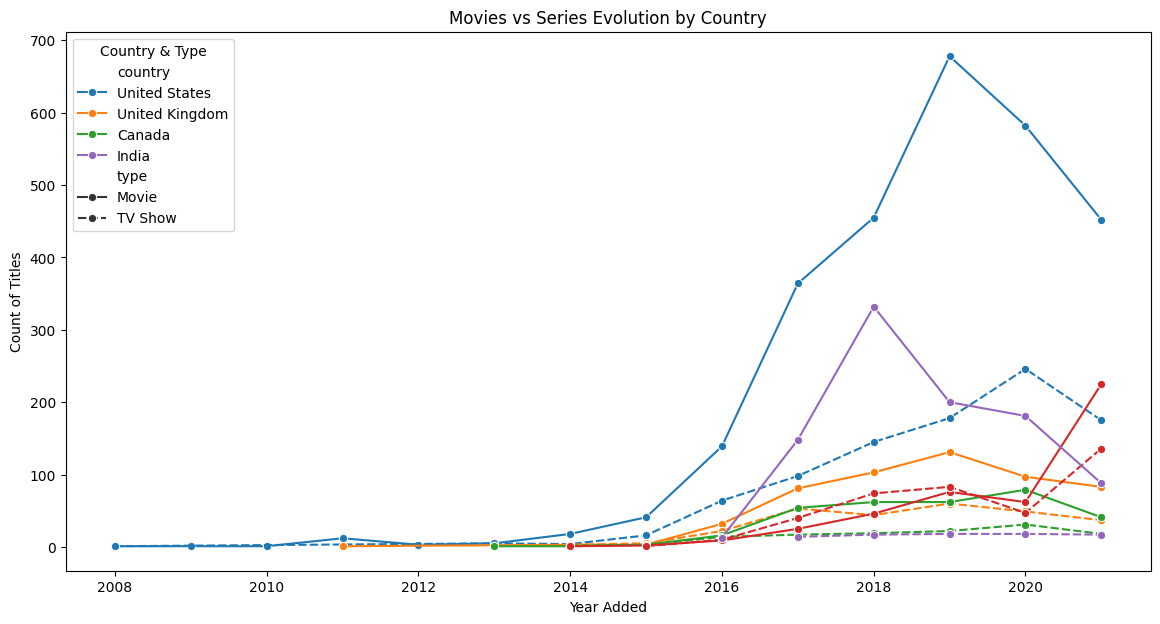

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=country_trend, x='year_added', y='count', hue='country', style='type', marker='o')
plt.title("Movies vs Series Evolution by Country")
plt.xlabel("Year Added")
plt.ylabel("Count of Titles")
plt.legend(title="Country & Type", loc='upper left')
plt.savefig('Shows_Evolution_of_top_country_across_year.png')
plt.show()


**Shows Evolution by Country**
* **United States** more dominant in **Movies** but also dominant in **Series**.
* **United States** content on **Netflix** grows afterward **2015** till **2019** and starts declining for **movies** where content for **series** starts increasing after **2016** till **2020**.
* **India** more dominant in **Movies** and growth of content starts from **2016** till **2018** and then starts **declining no of movies content .**
* Growth peaks around **2015-2019**, then declines for max of the countries.



---





---



## **Recommendation**

### **1. Content Strategy & Demand Focus**

* **International Movies & Dramas:** Increase the content related to them as they show the strongest demand.
* **Adult/Teen vs Kids/Family:** Keep supplying TV-MA / TV-14 content, but **expand TV-Y/TV-PG and PG-13** to balance the catalogue.

**Country-Specific Priorities:**
* **United States** - *comedy & drama heavy.*
* **India** - prioritize *International Movies.*
* **United Kingdom** - lean into *series*.

**Genre Expansion:**
* Continue focusing on ***Dramas, Comedies, Action,*** and ***Adventure*** to align with user demand.

### **2**. **Localization & Accessibility**

* **Language Debugging:** Popular content like India's ***International Movies needs better dubbing/subtitles*** *so other countries' users can engage more.*
* **Auto-play Dubs/Subs:** -- ***Debugging provide by locale***, *fallback to subtitles* if dubbing not present.

### **3**. **Release & Scheduling**

* **Seasonality:**

 * Strong months - **July & December** (continue using them for major launches).

 * Weak months - **February & May** (add releases to smooth the calendar).

* **Movies vs Series Balance:**

 * Make sure movies should around **99 min** duration.

 * Keep most series short -- max **1-2 seasons**.

 * UK's balance of movies & series is a good model -- maintain this.

**Special Events:** Run Comedy Weeks and Drama Drops during July/Dec peaks.

### **4. Talent & Creator Strategy**

* **Directors with Presence:** Rajiv Chilaka, Raul Campos, Suhas Kadav, Marcus Raboy → add their new projects within months.

* **Popular Actors:**
 * **Movies** -- **Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin.** *Encourage them to do series* projects as well.
 * **Series** -- **Takahiro Sakurai** dominates - onboard their series quickly.

### **5. Regional Content Expansion**

* **India & US:** Already leading - **India** with *International Movies*, **US** with *Dramas, Comedies, Documentaries.*
* Suggest expanding other genres in both markets to avoid over-reliance.
* **UK & India:** Promote more **kids/family** content, filling a major gap.

### 6. **Kids & Family Engagement**

* Content Gap: **Kids content lags behind adult/teen content.**
* Recommendation: **Add high-quality kids shows/movies to attract parents** who want safe, valuable content for children.
* Parental Controls: Ensure **kids profiles don't show adult suggestions**.
* Engagement Strategy: **Kids today are highly engaged with devices** - *Netflix should capture this audience* to boost subscriptions & retention.

### **7. Platform & Personalization**

* **Permanent Rows:** International Movies, Stand-Up Comedy, New UK Series, Award-winning Dramas.

* **Personalized Suggestions:**

 * If a user watches TV-MA dramas - recommend adjacent true-crime limited series.
 * **Notify users when their favorite directors, cast, or genres have new releases.**

### **8. Business & Subscription Strategy**

* Content Recovery: After the post-2016 decline (COVID-19 & other global factors), boost content additions again.

* **Flexible Plans:** Offer a 6-month subscription that's cheaper than 3-month/monthly.